# Data Analysis and Fitting
# Some "Gotchas" When Constructing Confidence Intervals
Below we will fit a non-linear forward model to non-linear data. We will then construct confidence intervals from covariance of the fit and using the chi-squared. This will illustrate when confidence interval construction becomes challenging or even impossible.

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot
import numpy as np
import scipy
font = {'size'   : 18}
matplotlib.rc('font', **font)
# set the random seed; get the same results each time we run this notebook
seed = sum([ord(x) for x in 'isrschool'])
np.random.seed(seed)
f_true = 2.4

## Forward Model
Here we are working with a non-linear cosine model:
$y = cos(2\pi ft)$

For this example, we'll define the true values for the parameters to be:
* f = 2.4

In [2]:
def model(t,f):
    lamda = 1.
    return np.cos(2*np.pi*f*t/lamda)

### Some measured data
Here we generate some "measured data". We'll generate several test cases:
1. "good data": small measurement errors
2. "noisey data": large measurement errors

In [3]:
# Set time samples
t = np.linspace(0,1,num=31)
nyquist = 1/(t[1]-t[0])/2. # nyquist frequency given sampling rate

# variance for each type of data we will generate
good_sigma = 0.5
noisey_sigma = 2.0

good_errors = good_sigma*np.random.randn(t.size)
good_data = model(t,f=f_true) + good_errors

noisey_errors = noisey_sigma*np.random.randn(t.size)
noisey_data = model(t,f=f_true) + noisey_errors

And we can plot these measurements

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


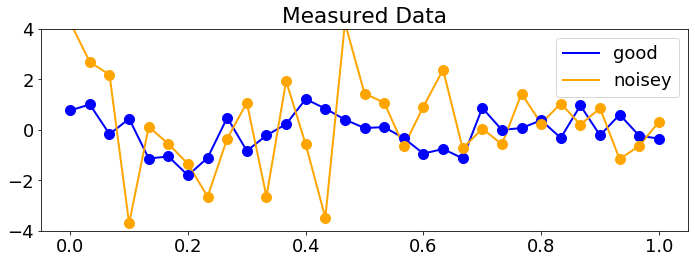

In [4]:
fig = pyplot.figure(figsize=(10,4))
ax = fig.add_subplot(111)
l = ax.plot(t,good_data,'b',lw=2,label='good')
l = ax.plot(t,noisey_data,color='orange',lw=2,label='noisey')
ax.legend()
l = ax.plot(t,good_data,'b.',ms=20)
l = ax.plot(t,noisey_data,'.',color='orange',ms=20)
ax.set_title('Measured Data')

lim = ax.set_ylim([-4,4])
fig.tight_layout()
fig.savefig('gotcha_meas.eps')

## Now fit the measurements
Now we'll fit the measurements, producing a $\chi^2(f)$ for each set of measurements:

$ \chi^2 = \sum^M_{m=1}{\frac{\left(d_m-y_m\right)^2}{\sigma_m^2}} $

where $d_m$ is the $m$-th data point and $y_m$ is the model evaluated at the $m$-th $x$ value. $\sigma_m$ is the error in the $m$-th data point, but we'll assume $\sigma_m=1$ for this example.

We'll calculate $\chi^2(f)$ for all $f \in [0,f_{nyquist}] $. Then we will plot the chi-squared as a function of the model parameters:

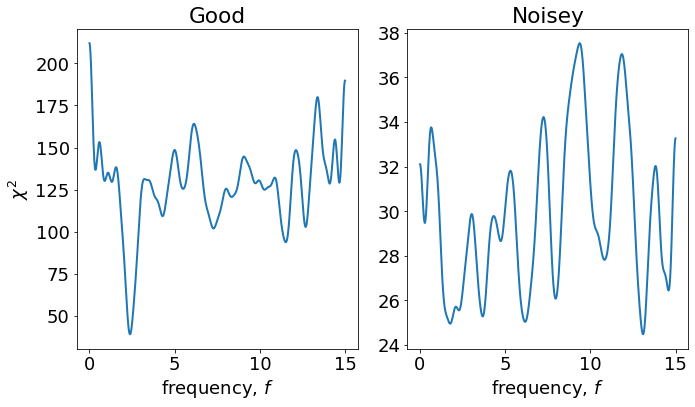

In [5]:
fs = np.linspace(0,nyquist,num=1001)

def get_chis(data,sigma):
    chis = np.zeros((fs.size))
    for i,f in enumerate(fs):
        diff = (data - model(t,f=f))/sigma
        chis[i] = np.sum(diff**2)

    return chis
        
good_chis = get_chis(good_data,good_sigma)
noisey_chis = get_chis(noisey_data,noisey_sigma)

# now plot
fig = pyplot.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
tmp = ax1.plot(fs,good_chis,lw=2)
# tmp = ax1.set_xticklabels([])
tmp = ax1.set_ylabel('$\chi^2$')
tmp = ax1.set_xlabel('frequency, $f$')
tmp = ax1.set_title('Good')
ax2 = fig.add_subplot(122)
tmp = ax2.plot(fs,noisey_chis,lw=2)
# tmp = ax2.set_ylabel('$\chi^2$')
tmp = ax2.set_xlabel('frequency, $f$')
tmp = ax2.set_title('Noisey')
fig.tight_layout()
fig.savefig('gotcha_chis.eps')

As we can see in the plot, when the data gets too noisey, there are multiple values of $f$ that produce similar local minima. 

How does one construct a confidence interval for the noisey data?

Not only will the best-fit frequency depend on the choice of an initial guess, but it is possible that fitting the noisey data will lead to several minima that are similarly significant (have similar $\chi^2$ values at the minimum).